<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Simple Linear Regression*

Note: Assume Cost and Loss functions are the same.



**Linear Regression Implementation Overview**

1. **Core Concept**
Linear regression tries to find the best straight line (or hyperplane in multiple dimensions) that fits the data by minimizing the distance between predicted and actual values. It does this by finding optimal values for weights (coefficients) and bias (intercept).

2. **Key Components**

   a) **Model Parameters**:
   - Weights (w): Determine how much each feature influences the prediction
   - Bias (b): The base value when all features are zero
   - Formula: y = w₁x₁ + w₂x₂ + ... + wₙxₙ + b

   b) **Learning Process**:
   - The model starts with random weights and zero bias
   - It iteratively adjusts these values to minimize prediction errors
   - Uses gradient descent to find the optimal parameters

3. **The Learning Algorithm**

   Step 1: Make predictions
   - Take input features and current weights
   - Calculate predicted values using the linear equation

   Step 2: Calculate errors
   - Compare predictions with actual values
   - Compute the mean squared error (cost function)

   Step 3: Update parameters
   - Calculate gradients (direction of steepest increase in error)
   - Update weights and bias in opposite direction of gradients
   - Size of update controlled by learning rate

   Step 4: Repeat
   - Continue this process for specified number of iterations
   - Track cost to monitor improvement

4. **Key Features of Implementation**

   a) **Data Handling**:
   - Splits data into training and testing sets
   - Scales features for better performance
   - Handles multiple input features

   b) **Analysis Tools**:
   - Tracks training progress
   - Calculates model performance metrics
   - Analyzes feature importance
   - Visualizes results

5. **Performance Evaluation**
   - R² Score: Measures proportion of variance explained
   - MSE/RMSE: Measures prediction error
   - Residual analysis: Checks model assumptions
   - Feature importance: Shows which inputs matter most



Loading housing dataset...

Analyzing features...

Feature Analysis:
      Feature  Correlation         Mean          Std         Min           Max
0      MedInc     0.690647     3.880754     1.904236    0.499900     15.000100
1    HouseAge     0.103706    28.608285    12.602118    1.000000     52.000000
2    AveRooms     0.158485     5.435235     2.387303    0.888889    141.909091
3   AveBedrms    -0.051351     1.096685     0.433201    0.333333     25.636364
4  Population    -0.026032  1426.453004  1137.021948    3.000000  35682.000000
5    AveOccup    -0.022030     3.096961    11.578394    0.692308   1243.333333
6    Latitude    -0.142983    35.643149     2.136601   32.550000     41.950000
7   Longitude    -0.046349  -119.582290     2.005593 -124.350000   -114.310000

Training model...
Iteration 100/1000, Cost: 0.659652
Iteration 200/1000, Cost: 0.357747
Iteration 300/1000, Cost: 0.310328
Iteration 400/1000, Cost: 0.298282
Iteration 500/1000, Cost: 0.291925
Iteration 600/1000, Cost: 

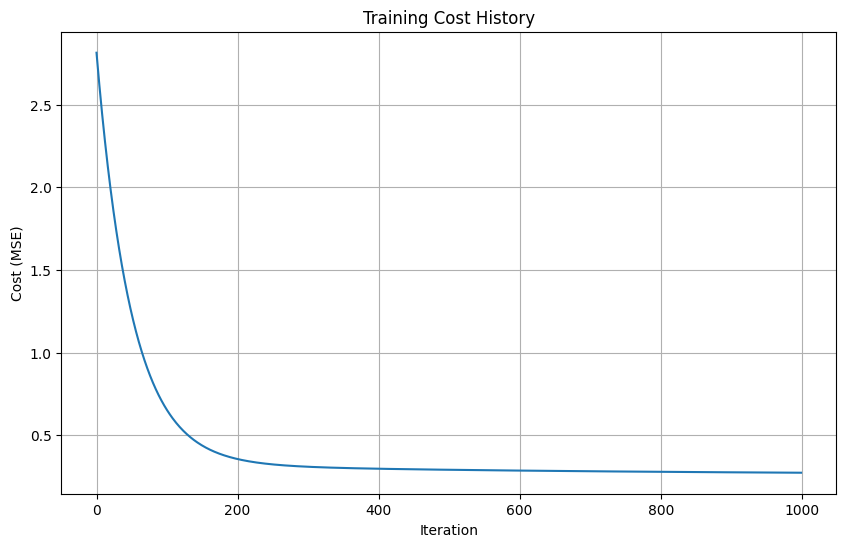

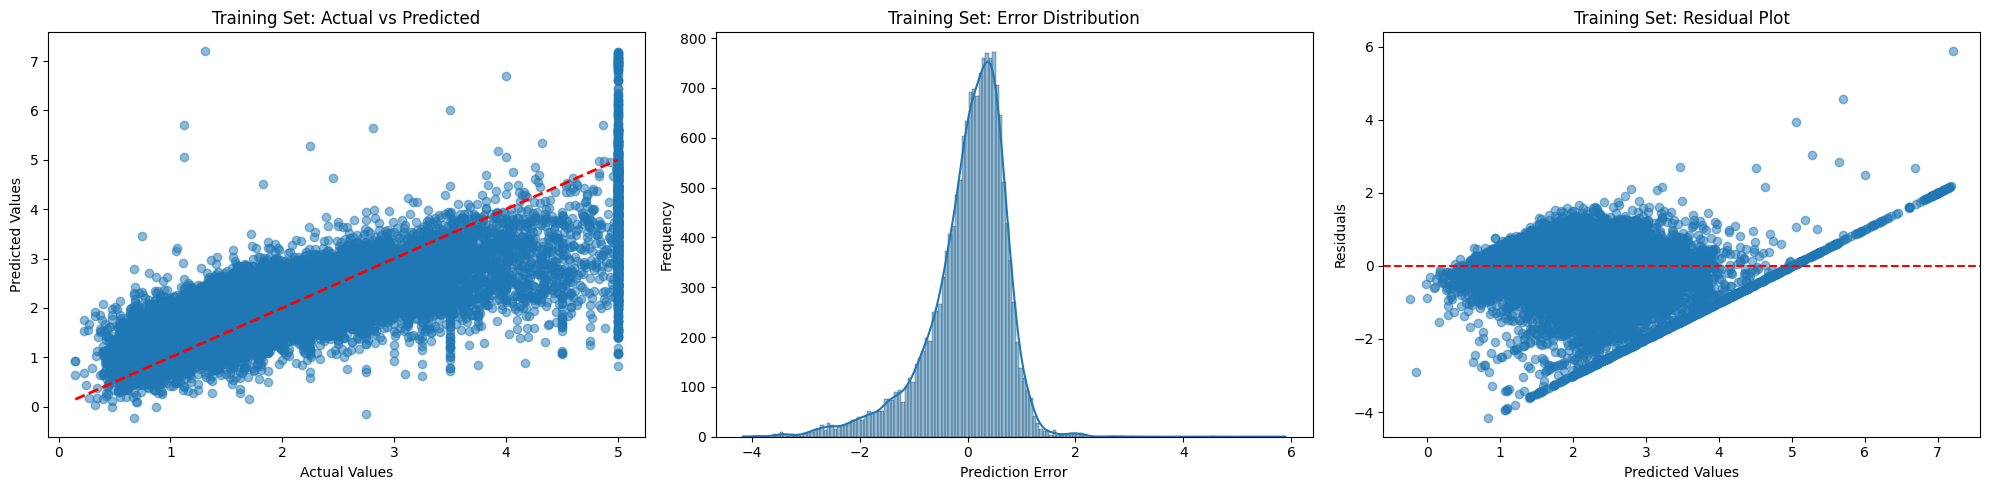

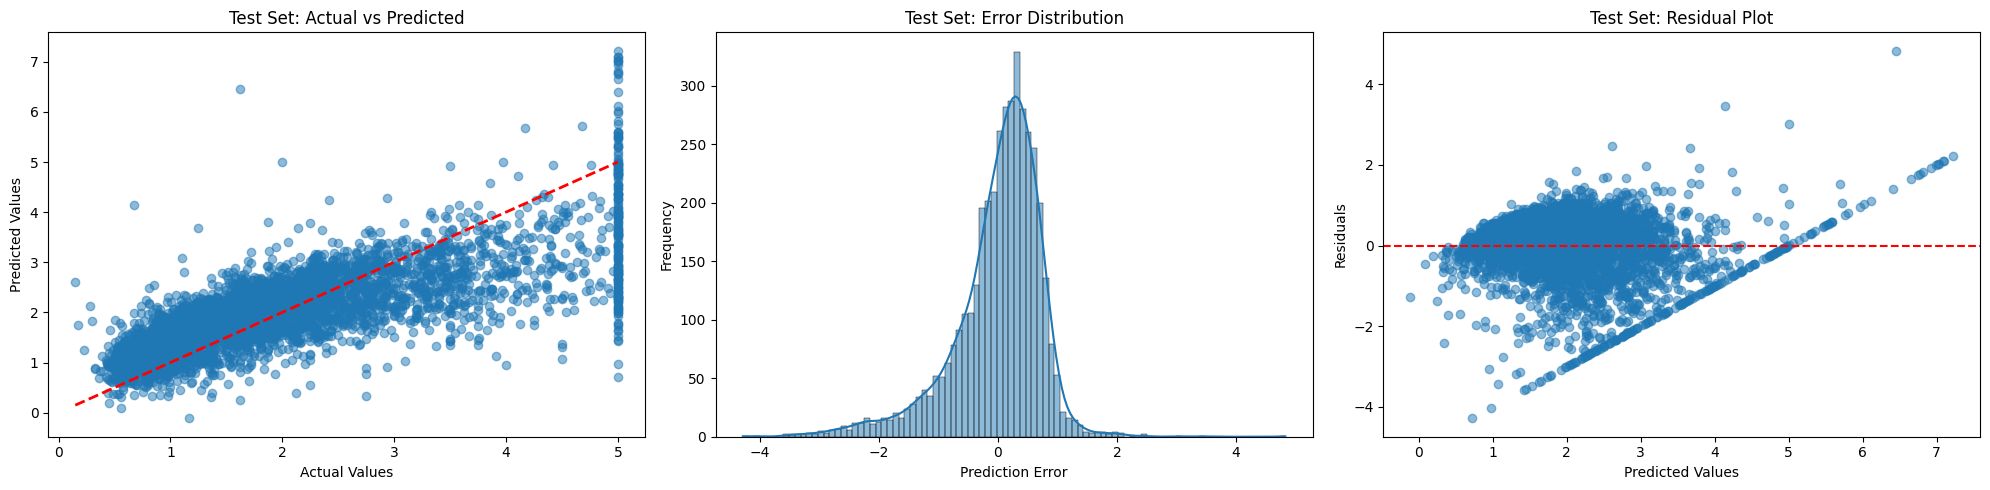

<Figure size 1000x600 with 0 Axes>

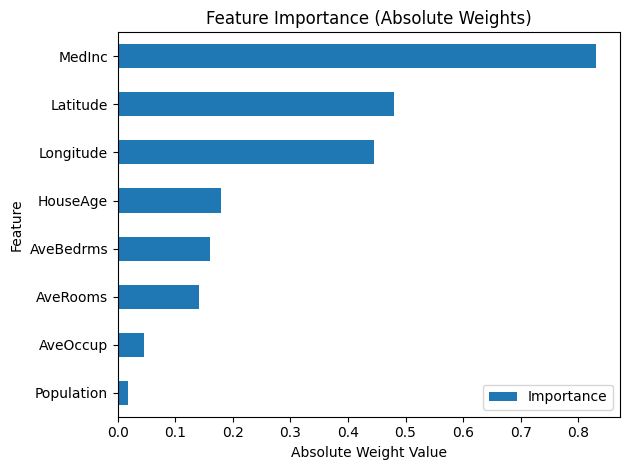

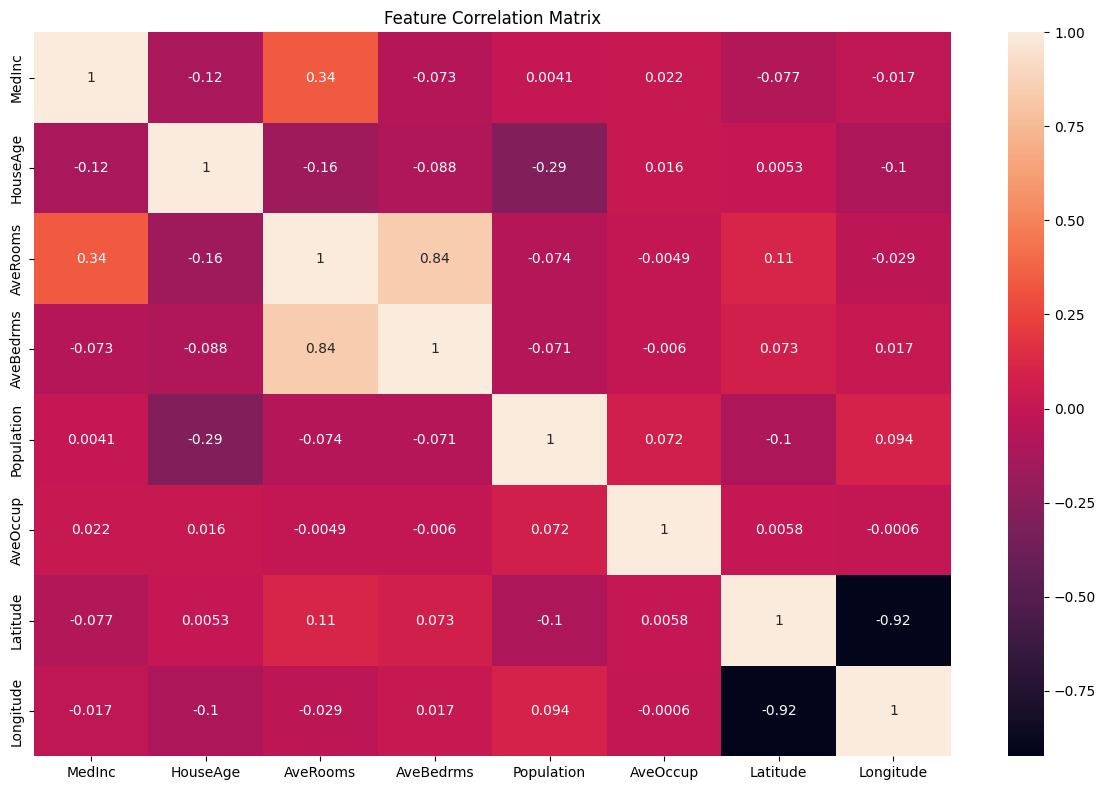

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize Linear Regression model

        Parameters:
        learning_rate (float): Step size for gradient descent
        n_iterations (int): Number of iterations for training
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _initialize_parameters(self, n_features):
        """Initialize weights and bias"""
        np.random.seed(42)
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0

    def _compute_cost(self, y_true, y_pred):
        """Compute Mean Squared Error cost"""
        m = len(y_true)
        cost = (1/(2*m)) * np.sum((y_pred - y_true) ** 2)
        return cost

    def _compute_gradients(self, X, y_true, y_pred):
        """Compute gradients for weights and bias"""
        m = len(y_true)
        dw = (1/m) * np.dot(X.T, (y_pred - y_true))
        db = (1/m) * np.sum(y_pred - y_true)
        return dw, db

    def fit(self, X, y, verbose=True):
        """
        Train the model using gradient descent

        Parameters:
        X (array): Training features
        y (array): Target values
        verbose (bool): Whether to print training progress
        """
        # Initialize parameters
        n_samples, n_features = X.shape
        self._initialize_parameters(n_features)

        # Gradient descent
        for iteration in range(self.n_iterations):
            # Forward pass
            y_pred = self.predict(X)

            # Compute gradients
            dw, db = self._compute_gradients(X, y, y_pred)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute cost and store
            cost = self._compute_cost(y, y_pred)
            self.cost_history.append(cost)

            # Print progress
            if verbose and (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}/{self.n_iterations}, Cost: {cost:.6f}")

    def predict(self, X):
        """Make predictions"""
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        """Compute R-squared score"""
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

def analyze_features(X, y, feature_names):
    """Analyze feature relationships with target"""
    analysis_results = []

    for i, feature in enumerate(feature_names):
        correlation = np.corrcoef(X[:, i], y)[0, 1]
        stats_dict = {
            'Feature': feature,
            'Correlation': correlation,
            'Mean': np.mean(X[:, i]),
            'Std': np.std(X[:, i]),
            'Min': np.min(X[:, i]),
            'Max': np.max(X[:, i])
        }
        analysis_results.append(stats_dict)

    return pd.DataFrame(analysis_results)

def plot_training_history(cost_history):
    """Plot training cost history"""
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost (MSE)')
    plt.title('Training Cost History')
    plt.grid(True)
    plt.show()

def plot_prediction_analysis(y_true, y_pred, title):
    """Create prediction analysis plots"""
    plt.figure(figsize=(20, 5))

    # Actual vs Predicted
    plt.subplot(1, 3, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{title}: Actual vs Predicted')

    # Error Distribution
    plt.subplot(1, 3, 2)
    errors = y_pred - y_true
    sns.histplot(errors, kde=True)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(f'{title}: Error Distribution')

    # Residual Plot
    plt.subplot(1, 3, 3)
    plt.scatter(y_pred, errors, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title}: Residual Plot')

    plt.tight_layout()
    plt.show()

def plot_feature_importance(feature_names, weights):
    """Plot feature importance"""
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(weights)
    })
    importance_df = importance_df.sort_values('Importance', ascending=True)

    plt.figure(figsize=(10, 6))
    importance_df.plot(x='Feature', y='Importance', kind='barh')
    plt.title('Feature Importance (Absolute Weights)')
    plt.xlabel('Absolute Weight Value')
    plt.tight_layout()
    plt.show()

def main():
    # Load dataset
    print("Loading housing dataset...")
    housing = fetch_california_housing()
    X, y = housing.data, housing.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Analyze features
    print("\nAnalyzing features...")
    feature_analysis = analyze_features(X_train, y_train, housing.feature_names)
    print("\nFeature Analysis:")
    print(feature_analysis)

    # Train model
    print("\nTraining model...")
    model = LinearRegressionFromScratch(learning_rate=0.01, n_iterations=1000)
    model.fit(X_train_scaled, y_train)

    # Evaluate model
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("\nModel Performance:")
    print(f"Training R² Score: {train_score:.4f}")
    print(f"Testing R² Score: {test_score:.4f}")

    # Generate predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate additional metrics
    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    print("\nError Metrics:")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Testing MSE: {test_mse:.4f}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")

    # Create visualizations
    print("\nGenerating visualizations...")

    # Plot training history
    plot_training_history(model.cost_history)

    # Plot prediction analysis
    plot_prediction_analysis(y_train, y_train_pred, "Training Set")
    plot_prediction_analysis(y_test, y_test_pred, "Test Set")

    # Plot feature importance
    plot_feature_importance(housing.feature_names, model.weights)

    # Feature correlations heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = np.corrcoef(X_train_scaled.T)
    sns.heatmap(correlation_matrix,
                annot=True,
                xticklabels=housing.feature_names,
                yticklabels=housing.feature_names)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()